<a href="https://colab.research.google.com/github/woongjichoi/flask/blob/master/kioya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#STT

In [ ]:
from __future__ import division

!pip install flask-ngrok
!pip install flask-cors
!pip install flask==0.12.2
from flask_cors import cross_origin
from flask import Flask, render_template, request, redirect, jsonify

!pip install google-cloud-speech


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/MyDrive/august-broker-320406-301a73102397.json" # STT API 키 

In [ ]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libportaudio2 is already the newest version (19.6.0-1).
libportaudiocpp0 is already the newest version (19.6.0-1).
portaudio19-dev is already the newest version (19.6.0-1).
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sample_file="/content/drive/MyDrive/cheeseburger.wav" # STT 샘플 파일 구글 드라이브에서 가져오기 

In [ ]:
pip install google-api-core

In [ ]:
pip install pyttsx3

In [ ]:
import pyttsx3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive"

In [ ]:
!sudo apt-get update && sudo apt-get install espeak

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic

In [ ]:
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)

engine=pyttsx3.init() # 콜백 에러 방지하기 위함 

def text_to_speech(text, gender): # TTS
    voice_dict = {'Male': 0, 'Female': 1}
    code = voice_dict[gender]
    
    engine=pyttsx3.init()
    engine.setProperty('rate', 150)  # 말하기 속도
    engine.setProperty('volume', 1)  # 볼륨 (min=0, MAX=1)
    voices = engine.getProperty('voices')
    engine.setProperty('voice', voices[code].id)

    engine.say(text)
    engine.save_to_file(text, path+"/sample_audio.mp3")
    engine.runAndWait()

def transcribe_streaming(stream_file): # STT
    """Streams transcription of the given audio file."""
    import io
    from google.cloud import speech

    client = speech.SpeechClient()

    with io.open(stream_file, "rb") as audio_file:
        content = audio_file.read()

    # In practice, stream should be a generator yielding chunks of audio data.
    stream = [content]

    requests = (
        speech.StreamingRecognizeRequest(audio_content=chunk) for chunk in stream
    )

    config = speech.RecognitionConfig(
        encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
        sample_rate_hertz=16000,
        language_code="ko-KR",
    )

    streaming_config = speech.StreamingRecognitionConfig(config=config)

    # streaming_recognize returns a generator.
    responses = client.streaming_recognize(
        config=streaming_config,
        requests=requests,
    )

    for response in responses:
        # Once the transcription has settled, the first result will contain the
        # is_final result. The other results will be for subsequent portions of
        # the audio.
        for result in response.results:
            #print("Finished: {}".format(result.is_final))
            #print("Stability: {}".format(result.stability))
            alternatives = result.alternatives
            # The alternatives are ordered from most likely to least.
            for alternative in alternatives:
              transcripted=alternative.transcript
                #print("Confidence: {}".format(alternative.confidence))
                #print(u"Transcript: {}".format(alternative.transcript))

    return transcripted

@app.route("/", methods=["GET", "POST"]) # STT
def index():
  global customer_said
  transcripted=transcribe_streaming(sample_file)
  customer_said=transcripted
  return customer_said

if __name__ == "__main__":
    app.run()
    

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://3f64-34-133-235-162.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


In [ ]:
customer_said

'하나 주세요'

In [ ]:
#Scenario

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!pip install import_ipynb

In [ ]:
import import_ipynb

In [ ]:
import intent_chatbot as intent

importing Jupyter notebook from intent_chatbot.ipynb
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
+ pip install konlpy
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
/etc/os-release:NAME="Ubuntu"
/etc/os-release:ID=ubuntu
/etc/os-release:ID_LIKE=debian
/etc/os-release:PRETTY_NAME="Ubuntu 18.04.5 LTS"
/etc

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


importing Jupyter notebook from ner_chatbot.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
sentence # 열의 중복을 제거한 값의 개수 : 5401
데이터에 Null 값이 있는지 유무 : True
   Sentence # Word     POS Tag Unnamed: 4
0           1   커피     NNG   O        NaN
1           1   주문     NNG   O        NaN
2           1  할게요  XSV+EC   O        NaN
3           1   주문     NNG   O        NaN
4           1    하     XSV   O        NaN
전체 샘플 개수: 5401
샘플의 최대 길이 : 10
샘플의 평균 길이 : 9.998519


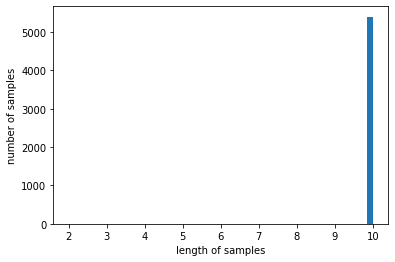

단어 집합의 크기 : 2171
개체명 태깅 정보 집합의 크기 : 22
단어 OOV의 인덱스 : 1
기존의 문장 : ['커피', '주문', '할게요', '주문', '하', '려고', '해요', '주문', '할게요', '주문']
디코딩 문장 : ['커피', '주문', '할게요', '주문', '하', '려고', '해요', '주문', '할게요', '주문']
훈련 샘플 문장의 크기 : (4320, 12)
훈련 샘플 레이블의 크기 : (4320, 12, 22)
테스트 샘플 문장의 크기 : (1081, 12)
테스트 샘플 레이블의 크기 : (1081, 12, 22)
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
정확도: 70.0%
     |████████████████████████████████| 43 kB 1.5 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=40d7b7209cf6513c92e9711f7abeb88fee8fd32153bc540490dfd5af0b10a232
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval
              precision    recall  f1-score   support

        item       0.00      0.00      0.00         1
         num       0.00      0.00      0.00         1

   micro avg       0.00      0.00      0.00         2
   macro avg       0.00      0.00      0.00         2
weighted av

In [ ]:
import ner_chatbot as ner

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import answer_chatbot as answer

importing Jupyter notebook from answer_chatbot.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
챗봇 샘플의 개수 : 7610
Q        0
A        0
Label    0
dtype: int64
['커피 주문할게요', '주문하려고 해요', '주문할게요', '주문받아 주실 수 있나요', '지금 주문 가능한가요']
['커피 주문하시겠습니까 ?', '주문하시겠습니까 ?', '주문하시겠습니까 ?', '주문하시겠습니까 ?', '주문하시겠습니까 ?']
시작 토큰 번호 : [6361]
종료 토큰 번호 : [6362]
단어 집합의 크기 : 6363
임의의 질문 샘플을 정수 인코딩 : [1261, 214, 29, 560, 19, 37]
정수 인코딩 후의 문장 [1261, 214, 29, 560, 19, 37]
기존 문장: 메뉴판에 있는 거 모두 주문 가능한가요
1261 ----> 메뉴판에 
214 ----> 있는 
29 ----> 거 
560 ----> 모두 
19 ----> 주문 
37 ----> 가능한가요
질문 데이터의 크기(shape) : (7610, 40)
답변 데이터의 크기(shape) : (7610, 40)
[6361   70   85 6362    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[6361   70    5    2 6362    0    0    0    0    0    0    0    0    0
    0    0    0    0

In [ ]:
def entity_recognition(sentence):
  return ner.entity_predict(sentence)

In [ ]:
answer.predict('아이스 아메리카노 한 잔 주세요')

'네 , 아이스 아메리카노 한 잔 드리겠습니다 .'

In [ ]:
entity_recognition('아이스 아메리카노 한 잔 주세요')

[('아이스', 'B-item'),
 ('아메리카노', 'I-item'),
 ('한', 'B-num'),
 ('잔', 'I-num'),
 ('주세요', 'O')]

In [ ]:
checklist={'item':[],'num':[]}

In [ ]:
#cart  -> (item,num)으로 저장되는 리스트 

#checklist -> cart에서 저장된 (item,num)에 대하여 pack,point,pay를 저장하는 리스트   
#checklist={('item','num'):([],[1]),'pack':[],'point':[],'pay':[]}


###cart에 (item,num)이 하나라도 있어야만 실행될수 있는 의도:4,5,6,7,9,10,11,12 로 만약 카트가 비었는데 호출되면 "먼저 상품을 선택해주세요" 답변 출력 및 entity 요청 
###input 의도가 3일떄만 cart에 item,num을 입력한다
###cart에 input 문장의 의도가 3일때만 (item,num)을 저장해준다 
###cart에 item만 먼저 입력되었을떈 num 입력을 요청한다
###중간의도 19,3 을 23으로 우선 설정

class scenario:
  def __init__(self, item:list, num):
    self.item = []
    self.num = []
    self.bio=[]   #ner tagging 결과 저장
    self.temp=[] #한번은 임시 저장
    self.alert_intent=[4,5,6,7,9,10,11,12]
    self.response=""
    self.pack=""
    self.ask=0 #주문 계속할지 묻는거
    self.flag=0  #주문하던 적이 있는지 체크
    print(f"{self.item} cart가 생성 되었습니다.")
    print(f"상품 : {self.item}, 수량 : {self.num}")
    
  #def check_pack(self,text):
    

  def check_entity(self,text):    #entity=[B-item,I-item,I-item ]이라 가정 
     self.bio=ner.entity_predict(text)
    
  def check_intent(self,text):
     self.intent=intent.predict(text)

  def answer(self,text):
     self.response=answer.predict(text)

 # def add_cart():
     
  def fill_cart(self,text): 
     global kiosk_said 
     self.check_entity(text) #모든문장이 입력되면 모두 개체명 인식은 진행
     self.check_intent(text) #모든문장이 입력되면 모두 인텐트 파악은 진행
     self.temp=self.bio #임시저장
     self.answer(text)
     if self.intent==3:  #의도가 3일때만 카트에 담기
       if not self.item:
          self.flag=1 
          for w in self.bio:
           if w[1]=='B-item' or w[1]=='I-item':  #상품명 추가
              if w[0]=='아아':
                self.item.append('아이스 아메리카노')
              else:  
                self.item.append(w[0])
           elif w[1]=='B-num' or w[1]=='I-num': #숫자 추가 
              if w[0]=='한 잔' or w[0]=='한잔' or w[0]=='하나' or w[0]=='한':  #bio 태깅 오류로 정해놓음
                self.num.append(1)
              elif w[0]=='주세요' or w[0]=='주문할게요' or w[0]=='잔':   #bio 태깅 오류로 정해놓음
                continue
              else:
                self.num.append(w[0])

          kiosk_said=self.response
          print(kiosk_said)
          print(f"상품 : {self.item}, 수량 : {self.num}")

       else: #중간의도 중 상품 주문하는것이 3으로 인식된 경우로 self.item이 null값이 아님
          for a in self.bio:
            if a[0]=='한 잔' or a[0]=='한잔' or a[0]=='하나' or a[0]=='한':  #bio 태깅 오류로 정해놓음
                self.num.append(1)
            elif a[0]=='주세요' or a[0]=='주문할게요' or a[0]=='잔':   #bio 태깅 오류로 정해놓음
                continue
            else:
                self.num.append(a[0]) 
            #주문내역 보여주기     
            print(self.item[0],self.num[0],"주문하셨습니다.")
     elif self.intent in self.alert_intent:  
          if (not self.item) or (not self.num): #카트가 비어있으면 카트 추가 x
              print("먼저 상품 주문을 해주세요!")
          else:  #카트가 비어있지 않으면 답변 출력 가능
              print(self.response)
        #elif self.intent==8:
     elif self.intent==14 or self.intent==18:
           print(self.response)
        
           print(self.item,"을 주문하던 중이었습니다.")
           ans=input("주문을 계속 진행하시겠습니까?")
           if ans=='네':
             print(self.item[0],self.num[0],"드릴까요?")
             ans2=input()
             if ans2=='네':
               print(self.item[0],self.num[0],"주문하셨습니다.")
     #elif self.intent==23:  #앞 문장에서 self.item이 개체명인식만 되고 카트에 담기진 않은 상태,뒤이어서 앞서 물어보았던 상품에 대한 주문을 진행하는 상황
       
     else:
            print(self.response)
     self.bio=[] #bio 태깅은 다시 갱신되기 위하여 비움  
        
     

In [ ]:
cart1=scenario("",0)

[] cart가 생성 되었습니다.
상품 : [], 수량 : []


In [ ]:
def chat():
   cart=scenario("",0)
   text=customer_said
   print("AI 점원:")
   cart.fill_cart(text)
     


In [ ]:
chat()

[] cart가 생성 되었습니다.
상품 : [], 수량 : []
AI 점원:
네 ,  아이스로 드시겠습니까 핫으로 드시겠습니까 ?
상품 : [], 수량 : [1]


In [ ]:
#TTS

In [ ]:
# TTS url 접속 시 ~.ngrok.io/tts?voices=Male  
@app.route("/tts", methods=["GET"])
@cross_origin()
def homepage():
  text=kiosk_said
  gender=request.args.get('voices')
  text_to_speech(text, gender)
  return path+"/sample_audio.mp3"

if __name__ == "__main__":
    app.run()

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://0af3-34-133-235-162.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [23/Nov/2021 16:24:58] "GET /tts?voices=Male HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Nov/2021 16:24:58] "GET /tts?voices=Male HTTP/1.1" 200 -
127.0.0.1 - - [23/Nov/2021 16:24:58] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Nov/2021 16:24:58] "GET /favicon.ico HTTP/1.1" 404 -
